<a href="https://colab.research.google.com/github/canimzali/Data_Science_Project/blob/main/project_of_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#math
import numpy as np # linear algebra

#importing dataset
import pandas as pd # data processing, CSV file

#model selection
from sklearn.model_selection import train_test_split,cross_val_score

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
#data preprocessing
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Data
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**First look to data**

In [3]:
df.describe().T



,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [4]:
df.select_dtypes(include=['object', ]).describe().T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df_dup = df[df.duplicated()]
df_dup

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
df.drop(index=[581], inplace=True)


In [9]:
#checking number of rows and columns
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 1337
Number of Columns 7


In [10]:
#getting more information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


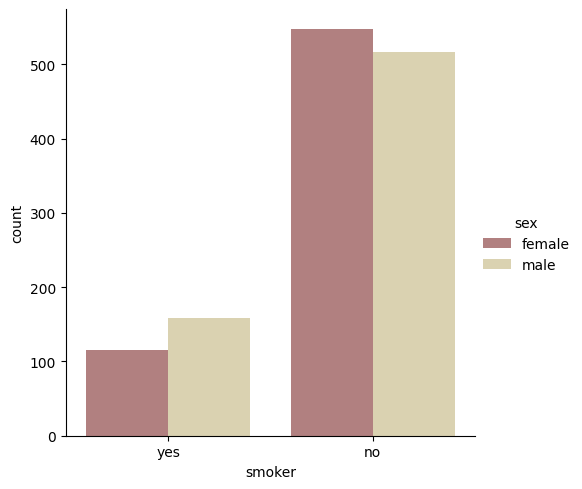

In [11]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=df)


In [12]:
#Data Preprocessing
encoder = LabelEncoder()
df['smoker'] = encoder.fit_transform(df['smoker'])
df['region'] = encoder.fit_transform(df['region'])
df['sex'] = encoder.fit_transform(df['sex'])
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,1,10600.5483
1334,18,0,31.92,0,0,0,2205.9808
1335,18,0,36.85,0,0,2,1629.8335
1336,21,0,25.80,0,0,3,2007.9450
1337,61,0,29.07,0,1,1,29141.3603


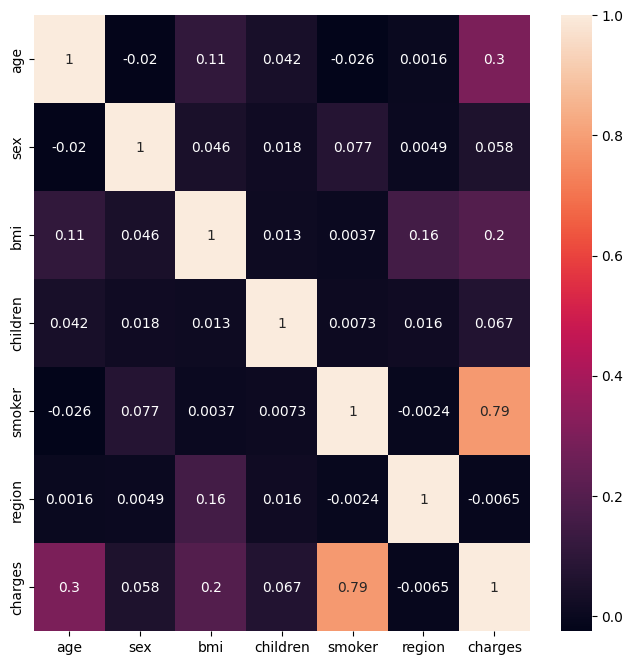

In [13]:
#Our aim are to find least correlaction coefficent at the table.

f, ax = plt.subplots(1, 1, figsize=(8, 8))
ax = sns.heatmap(df.corr(), annot=True)
plt.show()

In [14]:
#The correlation isn't enough to predtict for region column
df.drop(columns=['region'],axis=1)

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [15]:
#Here we select the features and target
y=df['charges']
x=df.drop(columns=['charges', 'region'],axis=1)

**Model Training**

# RANDOM FOREST

•	  Karar ağaçları, sınıflandırma ve regresyon problemlerinde kullanılır. Random Forests ise birçok karar ağacının bir araya gelmesiyle oluşur.

**Random forest:** Ağaçlar birleşerek bir orman oluşturuyor.Rastgele olarak.
Bir çok decision tree kırıyor ve bunların ortak sonucundan bir daha karar veriyor. Bir çok rastgele ağaç olduğu için ezberleme olmuyor.

**Doğruluk:**
Random Forest genellikle yüksek doğruluk sağlar. Özellikle değişkenler arasındaki karmaşık ilişkileri yakalayabilir.

**Aşırı Uyum:** Çeşitli ağaçlardan oluştuğu için aşırı uyum riski daha düşüktür



**Avantajları:**

-> Aşırı uyuma karşı dayanıklıdır.

-> Çeşitli veri türleriyle iyi çalışır.

-> Daha yüksek doğruluk sağlar.

**Dezavantajları:**

Daha yavaş ve karmaşıktır.

Yorumlaması zor olabilir.

**Kullanım Alanları:**

Finansal tahmin

Hastalık teşhisi

Pazarlama stratejileri

•	Farklı özniteliklerin ev fiyatları üzerindeki etkilerini değerlendirerek fiyatları tahmin etmek için kullanılabilir.

•	Bankaların kredi başvurularını değerlendirirken kredi verme kararlarını modellemek için kullanılır.

--------------------------------

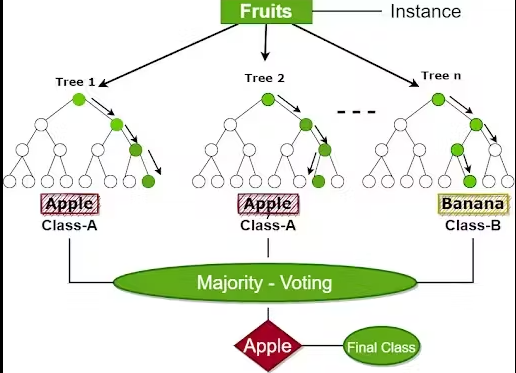

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=34)

In [30]:
rf=RandomForestRegressor(n_estimators=200, max_depth=4)
#n_estimators=100 default sayısıdır. n_estimators ormanda ağaç sayısıdır.
 #max_depth=4, ağacın derinlik sayısıdır ne kadar derinliğe indiğini gösterir. Scorumuzu yükseltebiliriz
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=4, n_estimators=200)

In [31]:
rf.score(x_test,y_test)

0.8423306977453838

In [32]:
y_pred1 = rf.predict(x_test)

In [41]:
x.iloc[1]


age         18.00
sex          1.00
bmi         33.77
children     1.00
smoker       0.00
Name: 1, dtype: float64

In [42]:
y.iloc[1]

1725.5523

In [43]:
denemerf=np.array(x.iloc[1])

In [44]:
rf.predict([denemerf])

array([3167.59570215])

# Decision Tree

Tanım:

Karar ağaçları, verileri sınıflandırmak veya regresyon yapmak için kullanılan sezgisel modellerdir.Features, bağımsız değişkeni sorarak ilerliyor. DecisionTree overfittinge yakın bir modeldir. Aşırı ezberleme yapabilir.

**Yapısı:**

**Düğüm (Node):** Bir özellik veya öznitelik üzerinde karar verir.

**Dal (Branch):** Karar sonuçlarına göre dallanır.

**Yaprak (Leaf):** Nihai sınıflandırma veya tahmin sonucunu verir.

**Avantajları:**

Anlaşılması ve görselleştirilmesi kolaydır.

Hem kategorik hem de sayısal verilerle çalışabilir.

Veri ön işleme gereksinimi azdır.


**Dezavantajları**

Aşırı uyuma (overfitting) yatkındır.

Veri gürültüsünden etkilenebilir.

**Kullanım Alanları:**

Müşteri segmentasyonu

Risk analizi

Tıbbi teşhis


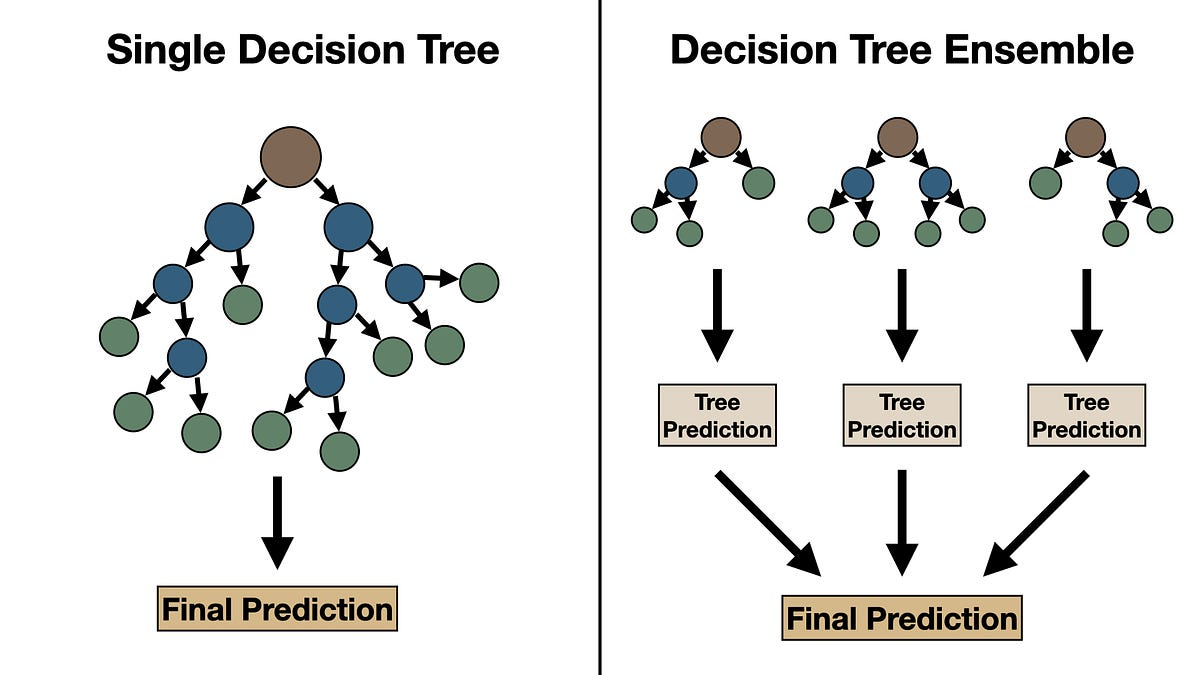

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
dt=DecisionTreeRegressor()
dt.fit(x,y)
#Overfitting

DecisionTreeRegressor()

In [47]:
dt.score(x,y)*100
#Overfitting durumu görüldü. Verdiğim yapıyı tamamen ezberlemiş bulundu.

99.86662352471029

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=34)
#Buradaki amaç ezberlemiş olduğu yapıyı dağıtıp train_test_split modeliyle elimdeki verinin %80 ile modeli eğitip,
#geri kalan %20 veri ile modelimi test formuna sokmaktır. Bu şekilde başarı oranı gözle görülür derece düşmüş bulunmakta ve
#model score ciddi derecede düşmüş bulunmaktadır.

In [49]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [50]:
dt.score(x_test,y_test)*100

70.68730329603885

In [51]:
y_pred2 = dt.predict(x_test)

# Linear Regression
 Büyük veri setlerinde kolayca çalışabilir ve hızlı uygulanabilir.



 y = a*X + b:

y – Dependent Variable
X – Independent variable
b – intercept
a – Slope

 a: X değişkenindeki her bir birimlik artışın y üzerindeki etkisini gösterir.

 b: X sıfırken y'nin değeri.

**Dezavantajları:**


Sadece doğrusal ilişkileri modelleyebilir.

Aykırı değerlerden etkilenebilir.

**Kullanım Alanları:**

Ekonomik tahminler

Satış tahminleri

Trend analizleri

İşletme verileri analizi

•	Bir değişkenin diğer değişkenlerle ilişkisini açıklamak için kullanılır.
•	Ev Fiyat tahmini- Bir bölgedeki ev fiyatlarını tahmin etmek için



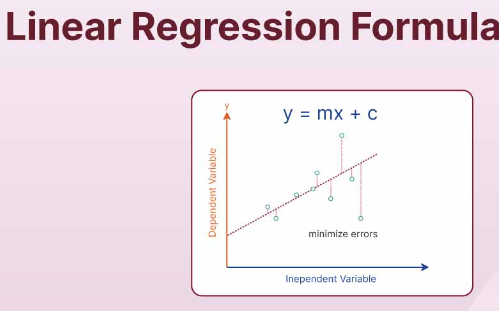

In [52]:
#Doğrusal regresyon, ilgili ve bilinen başka bir veri değeri kullanarak bilinmeyen verilerin değerini tahmin eden bir veri analizi tekniğidir
#Bilinmeyen veya bağımlı değişkeni ve bilinen veya bağımsız değişkeni doğrusal bir denklem olarak matematiksel olarak modeller.
#Örneğin, geçen yılki harcamalarınız ve geliriniz hakkında verileriniz olduğunu varsayalım.
#Doğrusal regresyon teknikleri bu verileri analiz eder ve giderlerinizin gelirinizin yarısı olduğunu belirler.
#Daha sonra gelecekteki bilinen bir geliri yarıya indirerek bilinmeyen bir gelecekteki gideri hesaplarlar..
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [53]:
lr.score(x_test,y_test)*100

71.72107766776234

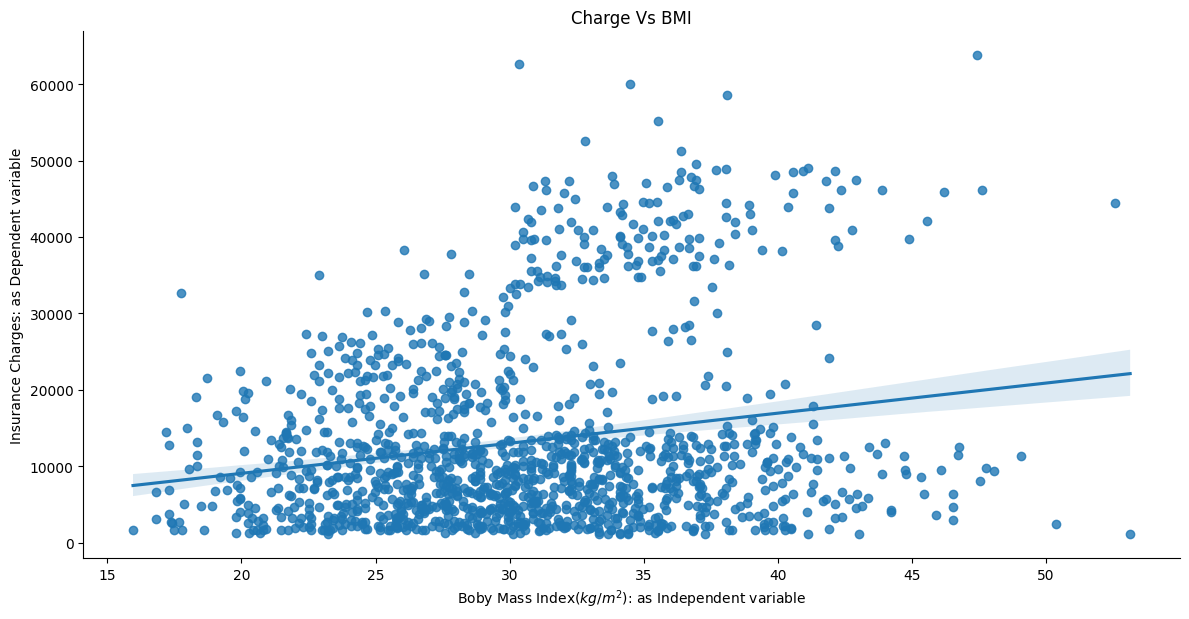

In [54]:
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

In [55]:
y_pred3 = lr.predict(x_test)

# Logistic Regression

•	Sınıflandırma problemlerinde kullanılır, iki veya daha fazla sınıf arasında işlem yapar.

•	Bir e-postanın spam olup olmadığını anlar.
Kullanıcılar için, e-posta spam mı değil mi ? Ek bakaj alacak mı almayacak mı? Kredi ödeyecek mi ödemeyecek mi? Sorularına cevap verirken kullanılır.
Yağmurlu günler aylık satışlarımızı etkiler mi? (evet ya da hayır)
Müşteri ne tür bir kredi kartı etkinliği gerçekleştiriyor? (yetkili, dolandırıcı veya potansiyel olarak dolandırıcı)

•	Sağlık sektöründe, hastaların belirli bir hastalığa sahip olup olmadığını tahmin etmek için kullanılır.


**Tanım:**

İkili (binary) sınıflandırma problemleri için kullanılan bir istatistiksel modeldir.

**Amaç:**

-> Olasılıkları tahmin eder ve sonuçları belirli bir sınıfa atar.
Denklem:

Sigmoid fonksiyonu kullanılır:
P(y=1)
=1/ 1+𝑒−(𝑎𝑋+𝑏)

​

**Avantajları:**

Basit ve hızlıdır.

Olasılık tahminleri sunar.

Çeşitli veri türleriyle çalışabilir.

**Dezavantajları:**

Sadece doğrusal sınırlara uygundur.

Çoklu sınıflar için genişletme gerekebilir (örneğin, One-vs-All).

**Kullanım Alanları:**

Tıbbi teşhis

Müşteri segmentasyonu

Pazarlama kampanyası tahminleri

Logistic regression, özellikle ikili sınıflandırma görevlerinde etkili bir yöntemdir.


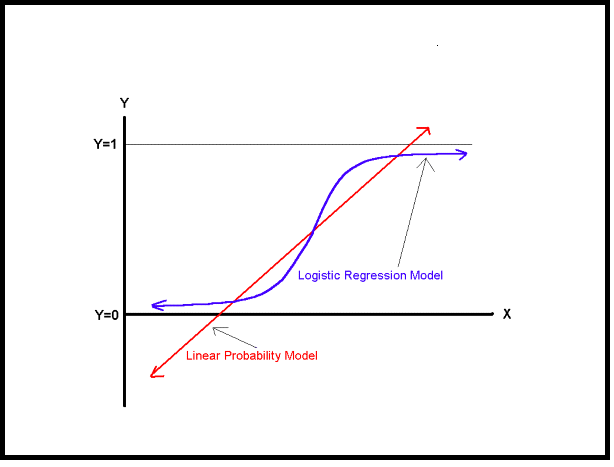

In [56]:
# Assuming 'y_train' contains continuous values, you might need to convert them into discrete classes
# For instance, if 'y_train' represents income, you can create classes like 'low', 'medium', 'high'
# Here's a simple example to binarize the target variable (replace with your own logic based on the data)
#y_train: Sürekli değerler içeren hedef değişken.
#y_train.mean(): y_train içindeki değerlerin ortalaması.
#(y_train > y_train.mean()).astype(int): Ortalamadan büyük olanları 1, küçük olanları 0 yaparak, ikili (binary) sınıflar oluşturuyoruz.
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()
y_train_binary = (y_train > y_train.mean()).astype(int)  # 1 if above mean, 0 otherwise
log.fit(x_train, y_train_binary) # Fit the model with the binarized target
log.score(x_test, (y_test > y_test.mean()).astype(int))*100 # Apply same binarization to y_test for scoring


91.7910447761194

In [57]:
y_pred4 = log.predict(x_test)

In [58]:
x.iloc[303]

age         28.0
sex          0.0
bmi         33.0
children     2.0
smoker       0.0
Name: 303, dtype: float64

In [59]:
y_train.mean()

12986.087326247894

In [60]:
y.iloc[303]

4349.462

In [61]:
denemex=np.array(x.iloc[303])

In [62]:
log.predict([denemex])

array([0])

# XGBoost

Boosting Yöntemi:

Birden fazla zayıf tahminciyi (örneğin, karar ağaçları) ardışık olarak ekler.

Her ağaç, önceki ağaçların hatalarını düzeltmeye çalışır.

**1. Tanım**

Amaç: Karmaşık veri setlerinde yüksek doğrulukla tahmin yapmak için geliştirilmiş bir algoritmadır.

**2. Çalışma Prensibi**

Boosting: Bir dizi zayıf tahminciyi ardışık olarak eğitir.

[link text](https://)Hata Düzeltme: Her yeni model, önceki modellerin hatalarını düzeltmeye odaklanır.

**Çalışma Prensibi**

Başlangıç: İlk olarak basit bir tahminle başlar (örneğin, ortalama değer).

Adım Adım İyileştirme: Her adımda bir karar ağacı ekleyerek modeli iyileştirir.

Hata Azaltma: Her yeni ağaç, önceki tahmin hatalarını azaltmaya odaklanır.

Sonuç: Tüm ağaçların birleşimi, daha iyi bir tahmin modeli oluşturur.

**Kullanım Alanları**

* Finansal tahminler

* Pazarlama analizi

* Tıp verileri analizi

* Sigorta risklerini ve primlerini tahmin etme.



In [63]:
XGB = XGBRegressor(learning_rate = 0.50 , max_depth = 2, n_estimators = 100)
XGB.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [64]:
XGB.score(x_test,y_test)

0.834616866963731

In [65]:
y_pred5=XGB.predict(x_test)

# **Evaluation**

In [66]:
df1= pd.DataFrame({"Actual":y_test, "lr":y_pred1, "XGB":y_pred5, "dt":y_pred2, "rf":y_pred3, "log":y_pred4})


In [67]:
df1

,Actual,lr,XGB,dt,rf,log
669,6500.23590,7491.309541,8106.691406,6238.29800,8286.528752,0
318,7421.19455,8348.230307,7297.548340,7626.99300,8174.015506,0
757,23065.42070,27005.362607,25167.843750,37829.72420,32769.216677,1
477,2534.39375,4021.963440,2347.520752,2322.62180,5603.053125,0
660,6435.62370,7688.812465,7667.706543,5757.41345,13607.001125,0
...,...,...,...,...,...,...
148,10959.69470,13392.411755,15366.501953,10579.71100,14148.622814,0
345,6184.29940,6738.483547,6878.793457,6059.17300,7435.656207,0
1000,17361.76610,18084.362174,20299.507812,18259.21600,27412.924500,1
531,14043.47670,13803.476411,13160.857422,13844.79720,14177.891427,0


In [68]:
print(y_test.shape, y_pred1.shape, y_pred5.shape, y_pred2.shape, y_pred4.shape, y_pred3.shape)


(268,) (268,) (268,) (268,) (268,) (268,)


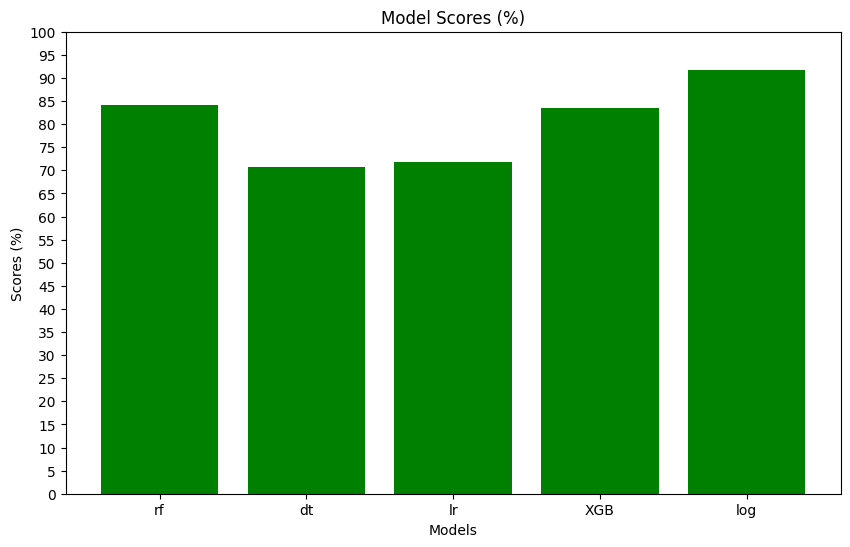

In [69]:
scores = {
    "rf": rf.score(x_test, y_test) * 100,
    "dt": dt.score(x_test, y_test) * 100,
    "lr": lr.score(x_test, y_test) * 100,
    "XGB": XGB.score(x_test, y_test) * 100,
    "log": log.score(x_test, (y_test > y_test.mean()).astype(int)) * 100}

plt.figure(figsize=(10, 6))
plt.bar(scores.keys(), scores.values(), color='green')
plt.title('Model Scores (%)')
plt.xlabel('Models')
plt.ylabel('Scores (%)')
plt.yticks(np.arange(0, 101, 5))
plt.show()
